# **Predicting Employee Attrition Using Workforce Analytics (IBM HR Analytics Dataset)**
**Introduction**

Employee-Attrition-Predicting-with-Workforce-Analytics Project revolves around applying machine learning algorithms to predict employee attrition based on various workplace and demographic conditions. It compares ensemble methods with linear models and investigates the most relevant factors affecting attrition. SHAP analysis will be conducted for result interpretation. Fairness and bias in predictive modeling will also be discussed, with an emphasis on class imbalance. The dataset is from the IBM HR Analytics Employee Attrition & Performance Dataset available on Kaggle.

**Research Questions:**

1. Can machine learning models accurately predict employee attrition, and how do ensemble methods compare to linear baselines?

2. Which workplace and demographic factors most significantly influence attrition, and can SHAP analysis explain them?

3. How can predictive models balance organizational decision-making with fairness and bias considerations, especially given class imbalance??

**Dataset Details:**


- **Name:** IBM HR Analytics Employee Attrition & Performance Dataset   
- **Source:** [Kaggle  – IBM HR Analytics Employee Attrition & Performance Dataset](https://www.kaggle.com/datasets/pavansubhasht ibm-hr-analytics-attrition-dataset)  
- **Contributors:** The dataset was collected by IBM HR analytics / internal HR surveys and made public via Kaggle




#**Loading Dataset**

In [88]:
# --- Block 1: Setup & configuration ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# Base models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Ensemble models (used later)
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier

RANDOM_STATE = 42
N_SPLITS = 5
TARGET = "Attrition"   # change if your target column name differs


In [90]:
file_path = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)


#**Exploratory Data Analysis**
Before Training and implementing the model, EDA is performed to have an idea about the dataset regarding data distribution

**Printing Imported Dataset with shape and Summary Statistics**

In [94]:
print("First few rows of the dataset:")
df.head()


First few rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Printing the Columns Name from Dataset**

In [97]:
print("\nColumns in the dataset:")
df.columns




Columns in the dataset:


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Printing the shape of dataset**

In [100]:

df.shape


(1470, 35)

# **Descriptive statistical Analysis for numerical columns**

In [103]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()


Descriptive Statistics for Numerical Columns:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# **Count Plot**

C:\Users\srava\AppData\Local\Temp\ipykernel_8504\3897591107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='viridis') # Added palette


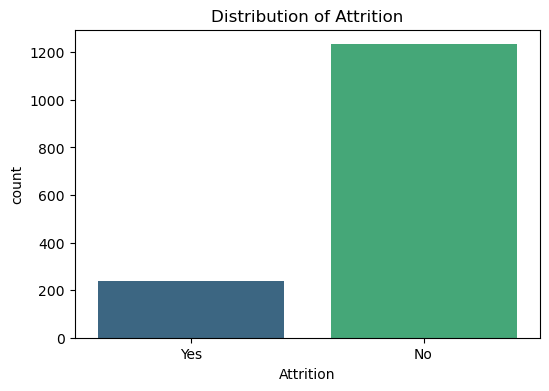

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='viridis') # Added palette
plt.title('Distribution of Attrition')
plt.show()

#**Distribution for Numerical Features**

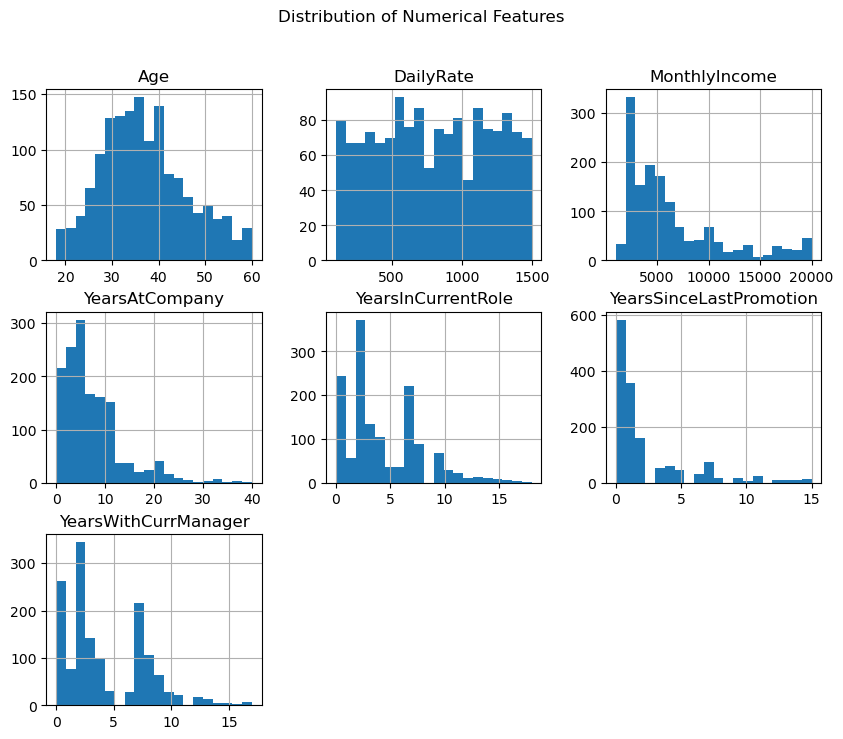

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['Age', 'DailyRate', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

df[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# **Correlation Matrix for Numerical Columns only**

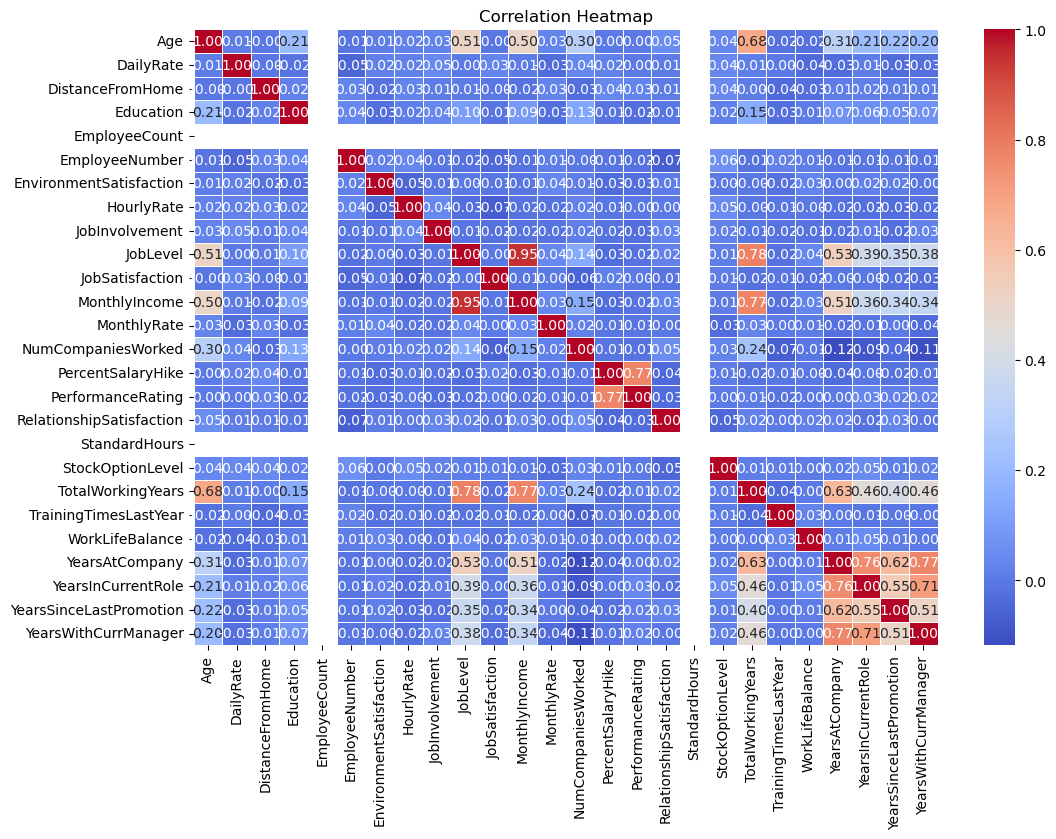

In [112]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns only
correlation_matrix = numerical_df.corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**After Removing Constant values**

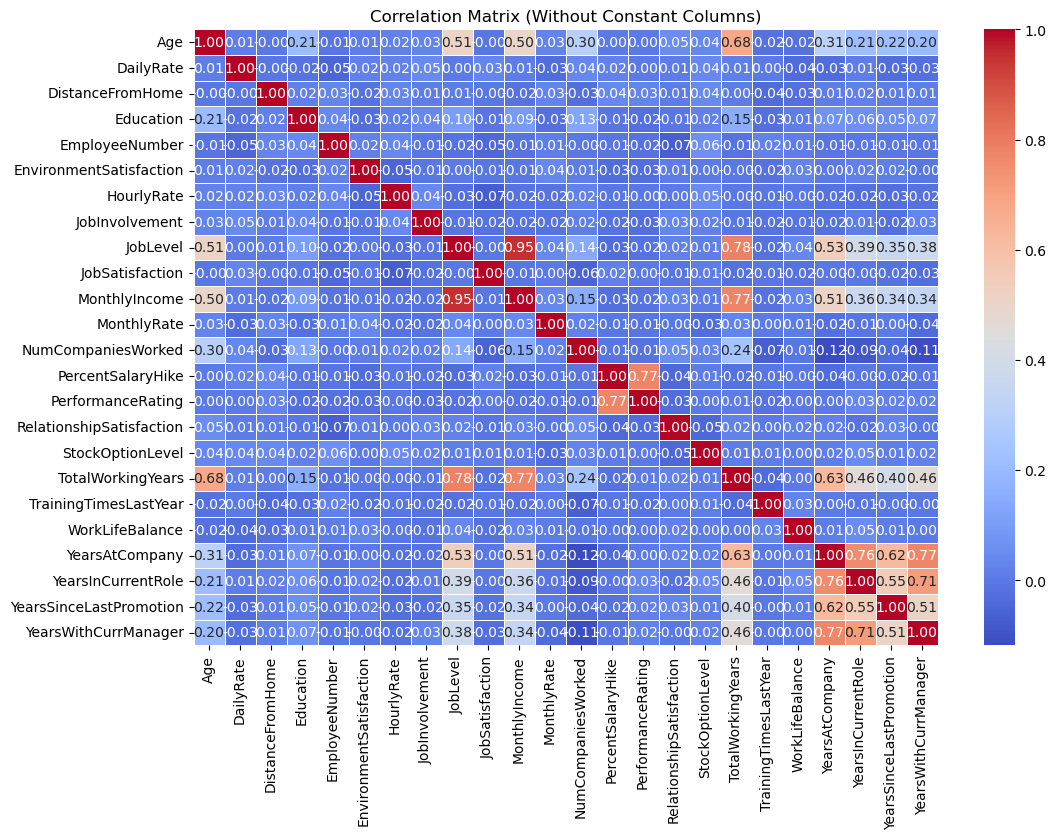

In [115]:
# Remove the constant columns (EmployeeCount and StandardHours)
df_cleaned = df.drop(columns=['EmployeeCount', 'StandardHours'])

# Select only numerical columns for correlation calculation
numerical_df_cleaned = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix_cleaned = numerical_df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Without Constant Columns)')
plt.show()

#**Finding Missing Values**

In [118]:
missing_data = df.isnull().sum()
print(f"Missing Data Summary:\n{missing_data}")

Missing Data Summary:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole

#**Pair Plot**
It is used to shows the relationships between multiple numerical variables

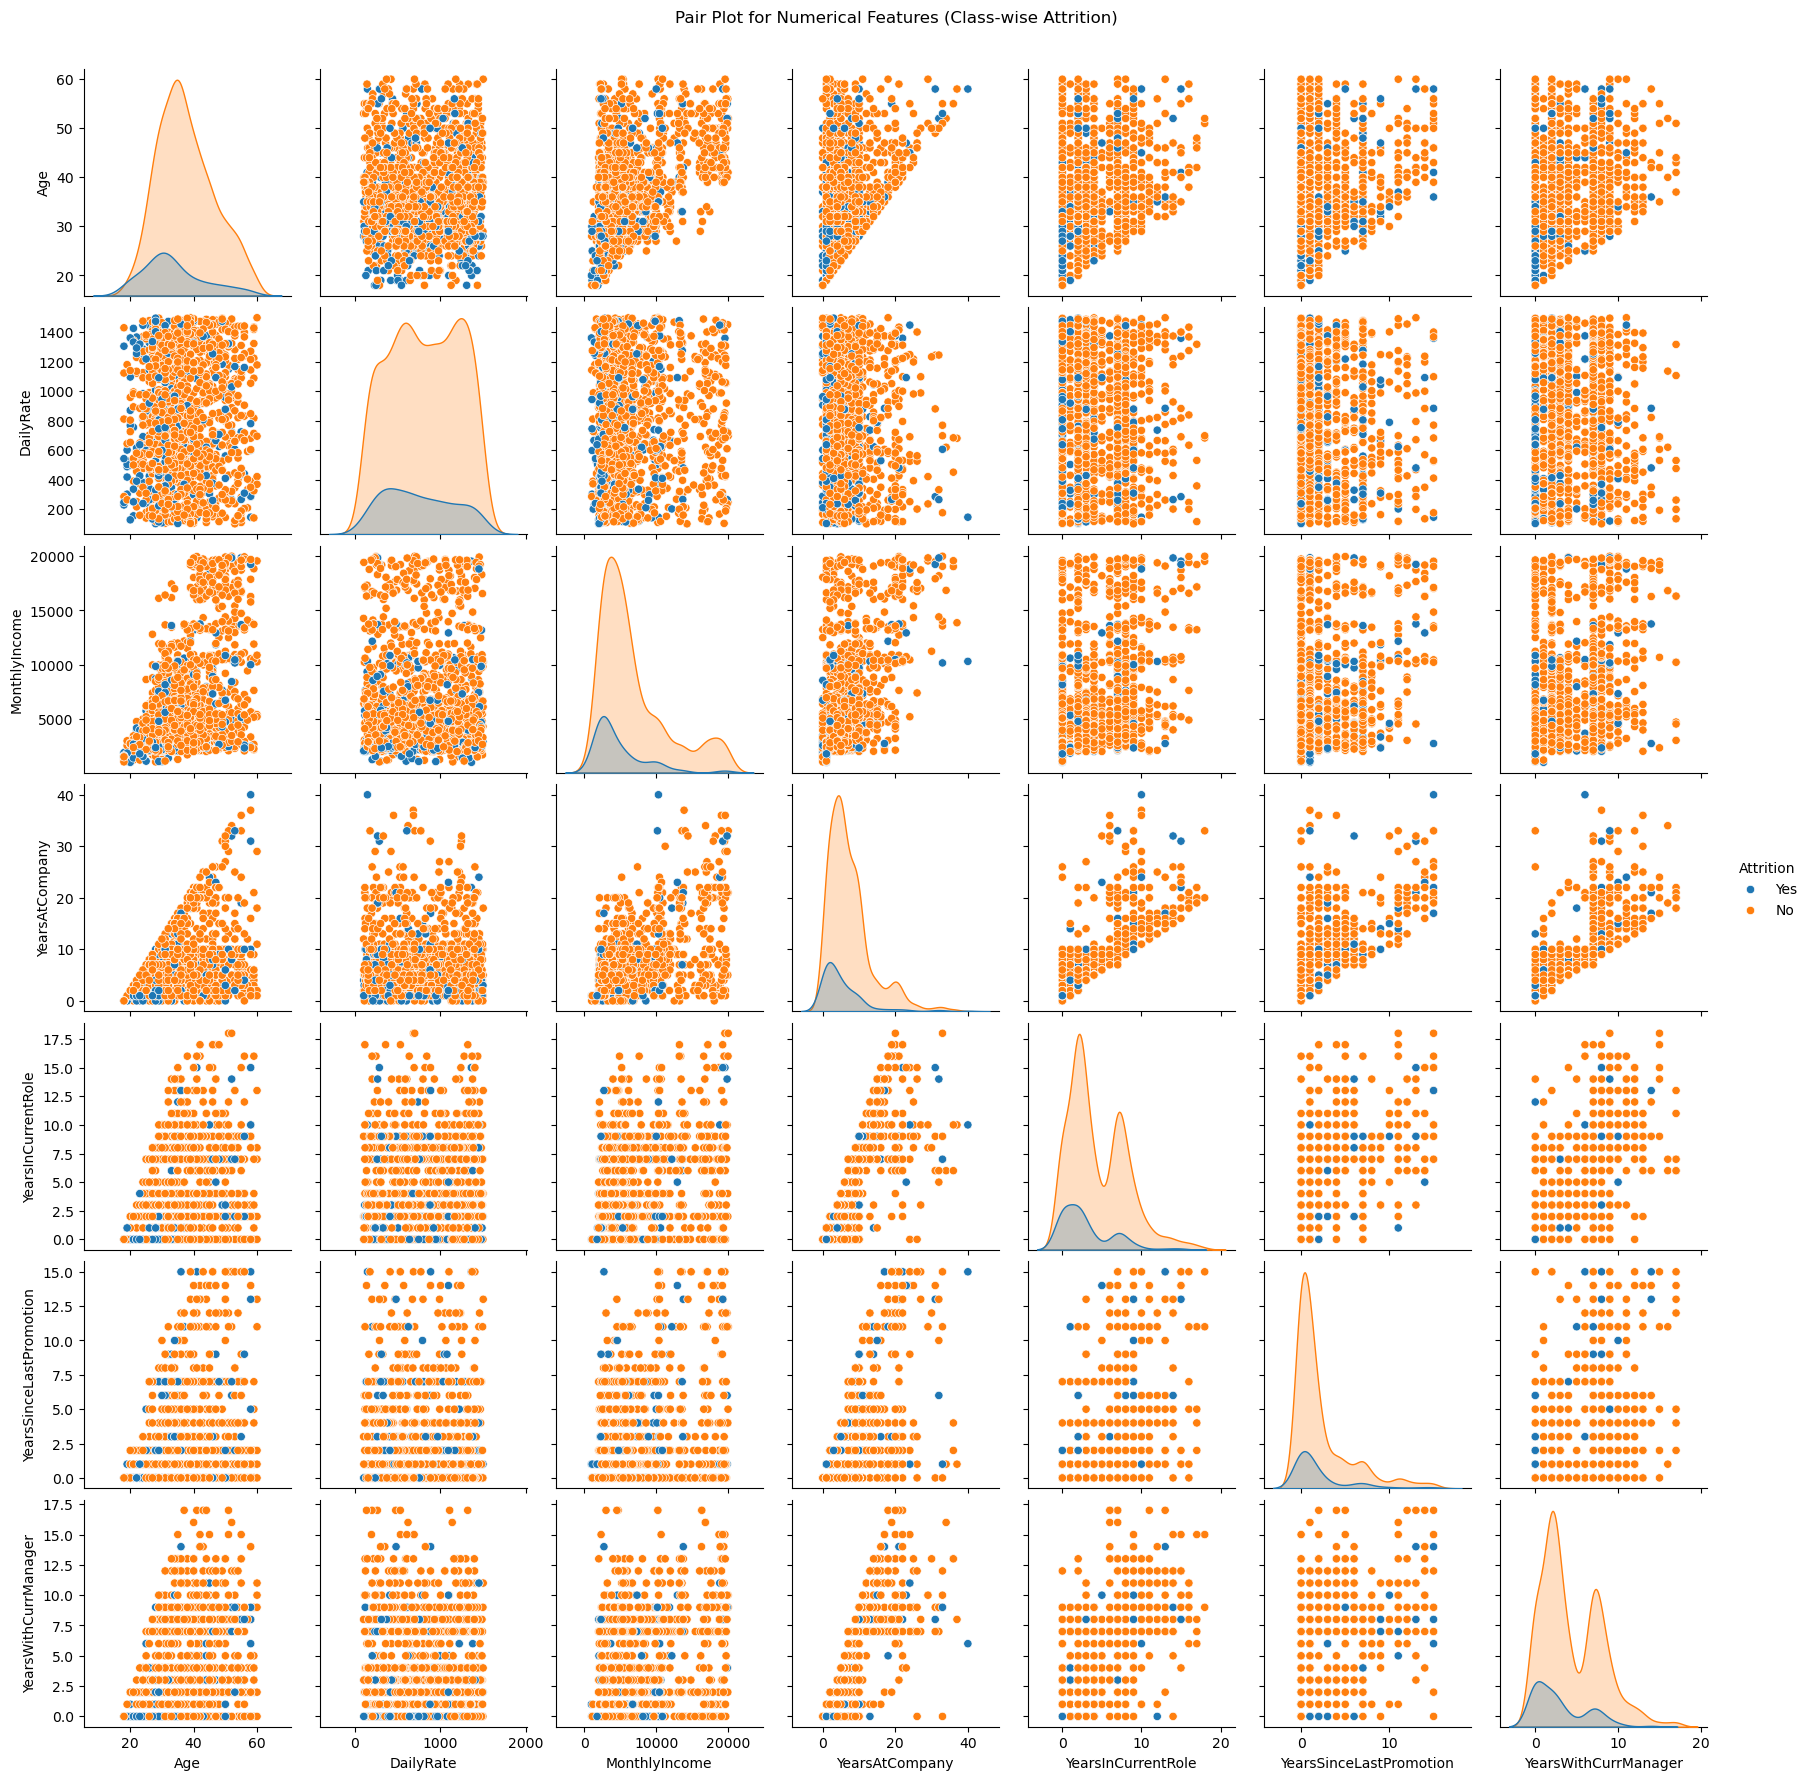

In [121]:
sns.pairplot(df, vars=numerical_columns, hue='Attrition')
plt.suptitle('Pair Plot for Numerical Features (Class-wise Attrition)', y=1.02)
plt.show()

# **Label Encodding**

In [124]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

display(df_cleaned.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


# **Feature Splitting**
- Target variable is seprated from other variables
- The dataset is divided into train and test set

In [127]:
# --- Block 2: Split features/target ---
assert TARGET in df_cleaned.columns, f"TARGET '{TARGET}' not found."

X = df_cleaned.drop(columns=[TARGET]).copy()
y_raw = df_cleaned[TARGET].copy()

# If y is 'Yes'/'No' convert to 1/0; if already numeric, this keeps it numeric.
y = pd.Series(y_raw).replace({"Yes":1, "No":0}).astype(int).values

# Sanity: after your label encoding, all features should be numeric
assert np.all([np.issubdtype(dt, np.number) for dt in X.dtypes]), "Non-numeric columns found—please ensure label encoding is applied to ALL features."

print(f"X shape: {X.shape} | positives in y: {y.sum()} / {len(y)}")


X shape: (1470, 32) | positives in y: 237 / 1470


**Dividing dataset into train and test**

In [130]:
# --- Block 3: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_STATE, stratify=y
)


# **Defining Basic Machine Learning Models**


In [133]:
from xgboost import XGBClassifier

# --- Block 4: Define BASIC models
basic_models = {
     "SVM_RBF": make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE)
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_STATE
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss', # Removing this line is fine if you have multiclass data
        random_state=RANDOM_STATE
    )
}

## **Defining Ensemble Models**

In [136]:
from sklearn.ensemble import VotingClassifier

# --- Block 5: Define Soft Voting Classifier ---
# Convert the dictionary of models into a list of (name, model) tuples
estimators_list = list(basic_models.items())

# Create the Soft Voting Classifier
voting_soft = VotingClassifier(
    estimators=estimators_list,
    voting='soft',
    n_jobs=-1  # Use all available cores
)

## **Training all models with dataset**
ROC Curve, Precision Recall Curve, Confusion Matrix, and Evaluation Matrix is calculated here

Fitting SVM_RBF...

=== SVM_RBF: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.868     0.988     0.924       247
           1      0.769     0.213     0.333        47

    accuracy                          0.864       294
   macro avg      0.819     0.600     0.629       294
weighted avg      0.852     0.864     0.830       294



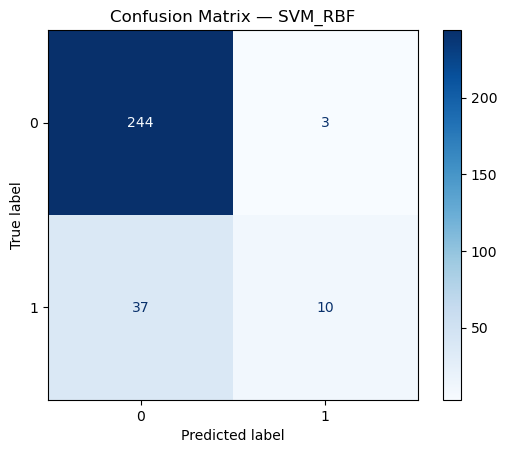

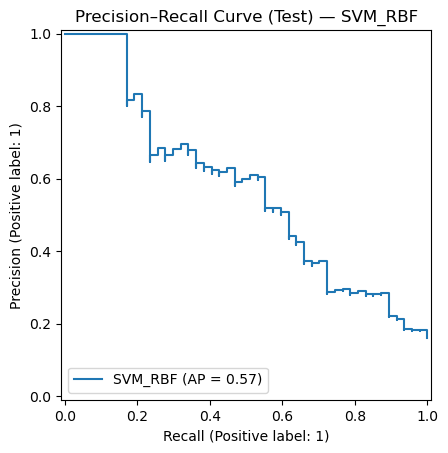

Fitting RandomForest...

=== RandomForest: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.851     0.951     0.899       247
           1      0.333     0.128     0.185        47

    accuracy                          0.820       294
   macro avg      0.592     0.540     0.542       294
weighted avg      0.769     0.820     0.785       294



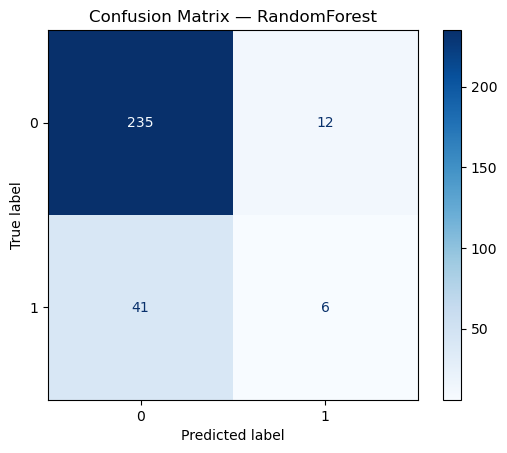

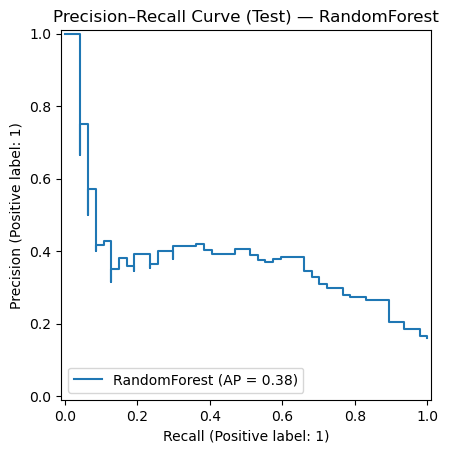

Fitting XGBoost...


C:\Users\srava\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:23:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.869     0.964     0.914       247
           1      0.550     0.234     0.328        47

    accuracy                          0.847       294
   macro avg      0.709     0.599     0.621       294
weighted avg      0.818     0.847     0.820       294



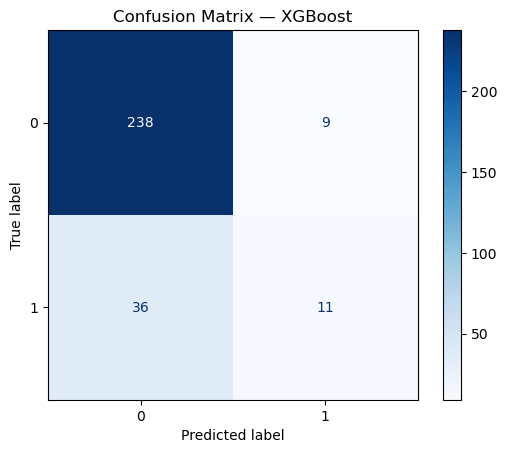

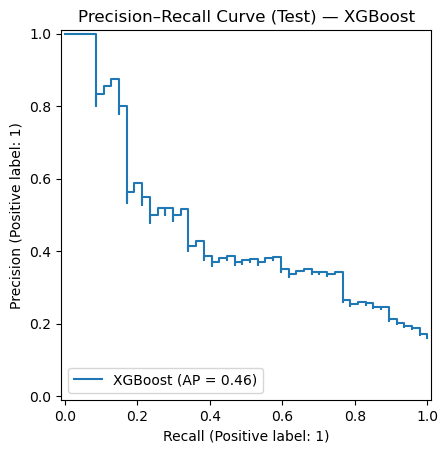

Fitting Voting_Soft...


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# --- Block 7: Fit ALL models & produce metrics + curves + confusion matrices ---

# 1. Package the Voting Classifier from the previous step
ensemble_models = {
    "Voting_Soft": voting_soft
}

# 2. Merge dictionaries to handle everything in one pass
all_models = {**basic_models, **ensemble_models}

metrics_rows = []
# List to store data for combined ROC plot
roc_data_for_combined_plot = []

def evaluate_full(name, model, X_tr, y_tr, X_te, y_te):
    # Fit
    print(f"Fitting {name}...")
    model.fit(X_tr, y_tr)

    # Scores
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
    else:
        # fallback to decision_function if no proba
        y_score = model.decision_function(X_te)
        # scale to [0,1] for plotting/metrics that expect probs
        y_proba = (y_score - y_score.min()) / (y_score.max() - y_score.min() + 1e-9)

    y_pred = model.predict(X_te)

    # Calculate Metrics
    acc   = accuracy_score(y_te, y_pred)
    prec  = precision_score(y_te, y_pred, zero_division=0)
    rec   = recall_score(y_te, y_pred, zero_division=0)
    f1    = f1_score(y_te, y_pred, zero_division=0)
    bal   = balanced_accuracy_score(y_te, y_pred)
    roc   = roc_auc_score(y_te, y_proba)
    ap    = average_precision_score(y_te, y_proba)

    # Store metrics
    metrics_rows.append({
        "model": name, "accuracy": acc, "precision": prec, "recall": rec,
        "f1": f1, "balanced_acc": bal, "roc_auc": roc, "avg_precision": ap
    })

    # Classification report
    print(f"\n=== {name}: Classification Report (Test) ===")
    print(classification_report(y_te, y_pred, digits=3))

    # --- PLOTTING ---
    # 1. Confusion matrix
    cm = confusion_matrix(y_te, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(values_format='d', cmap='Blues')
    plt.title(f"Confusion Matrix — {name}")
    plt.show()

    # 3. Precision-Recall curve
    PrecisionRecallDisplay.from_predictions(y_te, y_proba, name=name)
    plt.title(f"Precision–Recall Curve (Test) — {name}")
    plt.show()

    # Store ROC data for combined plot later (using the global list)
    roc_data_for_combined_plot.append((name, y_te, y_proba))


# Run the evaluation loop
for name, model in all_models.items():
    evaluate_full(name, model, X_train, y_train, X_test, y_test)

# --- Combined ROC Curve Plot ---
plt.figure(figsize=(10, 8))
ax = plt.gca() # Get current axis

for name, y_true_roc, y_proba_roc in roc_data_for_combined_plot:
    RocCurveDisplay.from_predictions(y_true_roc, y_proba_roc, name=name, ax=ax)

plt.title("Combined ROC Curves (Test)")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)") # Add diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Summary DataFrame
metrics_df = pd.DataFrame(metrics_rows).sort_values("roc_auc", ascending=False)
print("\n=== Metrics summary (sorted by ROC-AUC) ===")
print(metrics_df.round(3).to_string(index=False))

## **Calculating Train Time and test time for All models**

In [ ]:
# --- Block: Train & inference timing for all models ---
import time


# Reuse your models dict(s); if `all_models` not present, merge basics + ensembles
try:
    _ = all_models
except NameError:
    all_models = {}
    try:
        all_models.update(basic_models)
    except NameError:
        pass
    try:
        all_models.update(ensemble_models)
    except NameError:
        pass

assert len(all_models) > 0, "No models found. Define `basic_models` / `ensemble_models` first."

timing_rows = []

for name, model in all_models.items():
    # Clone fresh estimator if needed to avoid refit side-effects across runs
    est = model

    # ---- Train timing ----
    t0 = time.perf_counter()
    est.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    # ---- Test (inference) timing ----
    # We’ll time both class prediction and score/proba (if available) and sum them.
    t1 = time.perf_counter()
    y_pred = est.predict(X_test)
    infer_time_pred = time.perf_counter() - t1

    if hasattr(est, "predict_proba"):
        t2 = time.perf_counter()
        _ = est.predict_proba(X_test)
        infer_time_score = time.perf_counter() - t2
    else:
        t2 = time.perf_counter()
        # fall back to decision_function if probabilities are unavailable
        if hasattr(est, "decision_function"):
            _ = est.decision_function(X_test)
        else:
            # nothing extra to time
            pass
        infer_time_score = time.perf_counter() - t2

    test_time = infer_time_pred + infer_time_score

    timing_rows.append({
        "model": name,
        "train_time_sec": train_time,
        "test_time_sec": test_time,
        "test_samples": len(X_test),
        "time_per_sample_ms": (test_time / len(X_test)) * 1000.0
    })

timing_df = pd.DataFrame(timing_rows).sort_values("train_time_sec")
print("\n=== Train/Test timing (seconds) ===")
print(timing_df.to_string(index=False, formatters={
    "train_time_sec": lambda x: f"{x:.4f}",
    "test_time_sec": lambda x: f"{x:.4f}",
    "time_per_sample_ms": lambda x: f"{x:.3f}"
}))


# **Balance the Training Dataset with SMOTE**


Apply SMOTE to X_train and y_train to create X_train_resampled and y_train_resampled, addressing the class imbalance.


In [143]:
from imblearn.over_sampling import SMOTE

print(f"Original y_train shape: {y_train.shape}")
print(f"Original y_train class distribution:\n{pd.Series(y_train).value_counts()}")

# Instantiate SMOTE
smote = SMOTE(random_state=RANDOM_STATE)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"\nResampled y_train shape: {y_train_resampled.shape}")
print(f"Resampled y_train class distribution:\n{pd.Series(y_train_resampled).value_counts()}")

Original y_train shape: (1176,)
Original y_train class distribution:
0    986
1    190
Name: count, dtype: int64

Resampled y_train shape: (1972,)
Resampled y_train class distribution:
0    986
1    986
Name: count, dtype: int64


C:\Users\srava\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\srava\anaconda3\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [145]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# 1. Define new sets of basic models

balanced_basic_models = {
        "SVM_RBF_balanced": make_pipeline(
        StandardScaler(),
        SVC(kernel="rbf", probability=True, random_state=RANDOM_STATE)
    ),
    "RandomForest_balanced": RandomForestClassifier(
        n_estimators=100,
        random_state=RANDOM_STATE
    ),
    "XGBoost_balanced": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss', # Removing this line is fine if you have multiclass data
        random_state=RANDOM_STATE
    )
}

# 2. Create a list of tuples for the VotingClassifier
balanced_estimators_list = list(balanced_basic_models.items())

# 3. Define a new VotingClassifier using the balanced basic models
balanced_voting_soft = VotingClassifier(
    estimators=balanced_estimators_list,
    voting='soft',
    n_jobs=-1
)

# 4. Create a new dictionary `balanced_all_models`
balanced_all_models = {**balanced_basic_models, "Voting_Soft_balanced": balanced_voting_soft}

# 5. Iterate through `balanced_all_models` and train each model
print("Training models on resampled data...")
for name, model in balanced_all_models.items():
    print(f"  Fitting {name}...")
    model.fit(X_train_resampled, y_train_resampled)

print("All models trained successfully on resampled data.")

Training models on resampled data...
  Fitting SVM_RBF_balanced...
  Fitting RandomForest_balanced...
  Fitting XGBoost_balanced...


C:\Users\srava\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:24:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Fitting Voting_Soft_balanced...


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

## **Model Evalue on balance dataset**


Evaluating models trained on resampled data...
Fitting SVM_RBF_balanced (on resampled data)...

=== SVM_RBF_balanced: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.892     0.899     0.895       247
           1      0.444     0.426     0.435        47

    accuracy                          0.823       294
   macro avg      0.668     0.662     0.665       294
weighted avg      0.820     0.823     0.822       294



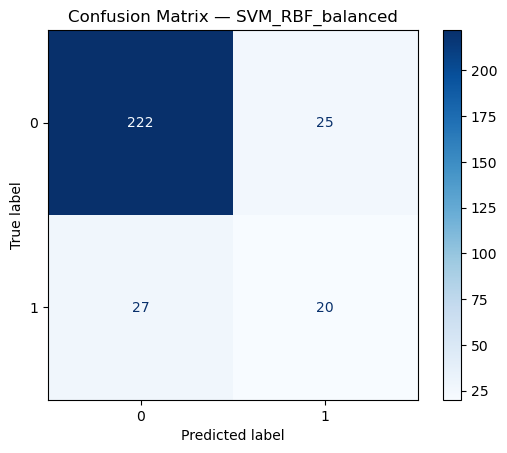

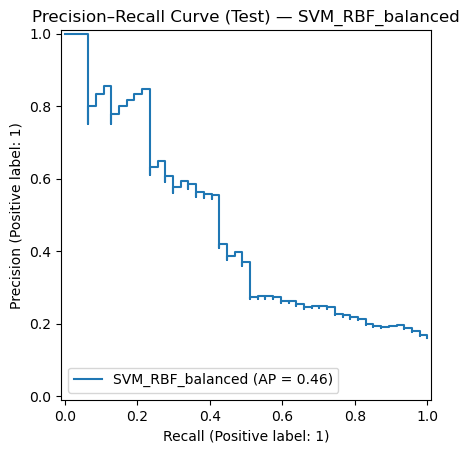

Fitting RandomForest_balanced (on resampled data)...

=== RandomForest_balanced: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.871     0.879     0.875       247
           1      0.333     0.319     0.326        47

    accuracy                          0.789       294
   macro avg      0.602     0.599     0.601       294
weighted avg      0.785     0.789     0.787       294



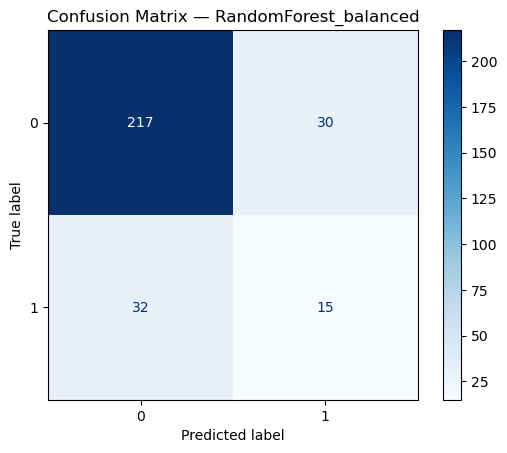

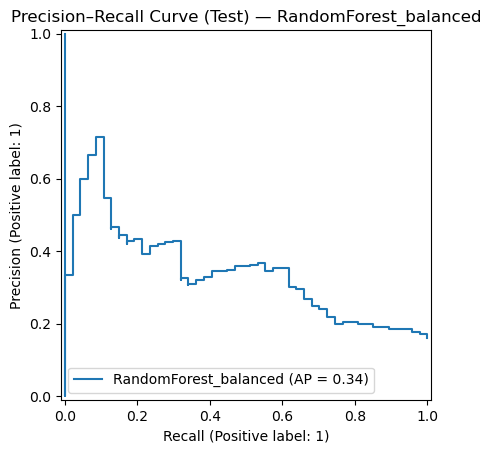

Fitting XGBoost_balanced (on resampled data)...


C:\Users\srava\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:25:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost_balanced: Classification Report (Test) ===
              precision    recall  f1-score   support

           0      0.880     0.923     0.901       247
           1      0.457     0.340     0.390        47

    accuracy                          0.830       294
   macro avg      0.669     0.632     0.646       294
weighted avg      0.813     0.830     0.820       294



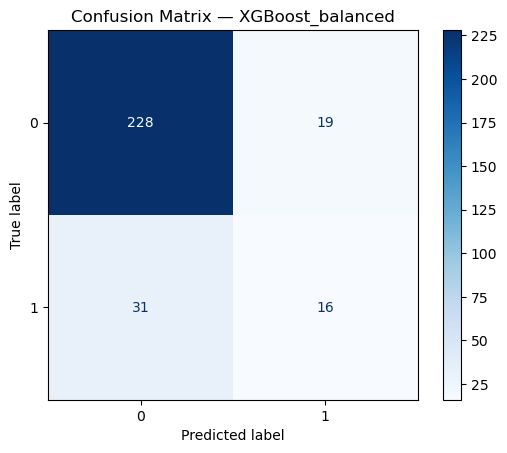

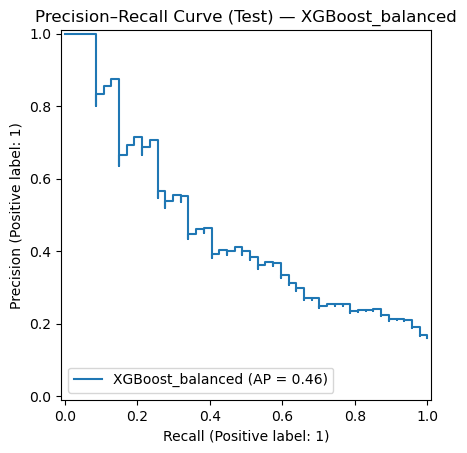

Fitting Voting_Soft_balanced (on resampled data)...


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score, roc_auc_score, average_precision_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

# --- Block 6: Fit ALL models & produce metrics + curves + confusion matrices (for balanced models) ---

metrics_rows_balanced = []
roc_data_for_combined_plot_balanced = []

def evaluate_full_balanced(name, model, X_tr_resampled, y_tr_resampled, X_te, y_te, metrics_list, roc_list):
    # Fit (models are already fitted in the previous block, but `evaluate_full` function refits them)
    print(f"Fitting {name} (on resampled data)...")
    model.fit(X_tr_resampled, y_tr_resampled)

    # Scores
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
    else:
        # fallback to decision_function if no proba
        y_score = model.decision_function(X_te)
        # scale to [0,1] for plotting/metrics that expect probs
        y_proba = (y_score - y_score.min()) / (y_score.max() - y_score.min() + 1e-9)

    y_pred = model.predict(X_te)

    # Calculate Metrics
    acc   = accuracy_score(y_te, y_pred)
    prec  = precision_score(y_te, y_pred, zero_division=0)
    rec   = recall_score(y_te, y_pred, zero_division=0)
    f1    = f1_score(y_te, y_pred, zero_division=0)
    bal   = balanced_accuracy_score(y_te, y_pred)
    roc   = roc_auc_score(y_te, y_proba)
    ap    = average_precision_score(y_te, y_proba)

    # Store metrics
    metrics_list.append({
        "model": name, "accuracy": acc, "precision": prec, "recall": rec,
        "f1": f1, "balanced_acc": bal, "roc_auc": roc, "avg_precision": ap
    })

    # Classification report
    print(f"\n=== {name}: Classification Report (Test) ===")
    print(classification_report(y_te, y_pred, digits=3))

    # --- PLOTTING ---
    # 1. Confusion matrix
    cm = confusion_matrix(y_te, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(values_format='d', cmap='Blues')
    plt.title(f"Confusion Matrix \u2014 {name}")
    plt.show()

    # 3. Precision-Recall curve
    PrecisionRecallDisplay.from_predictions(y_te, y_proba, name=name)
    plt.title(f"Precision\u2013Recall Curve (Test) \u2014 {name}")
    plt.show()

    # Store ROC data for combined plot later
    roc_list.append((name, y_te, y_proba))


# Run the evaluation loop for balanced models
print("\nEvaluating models trained on resampled data...")
for name, model in balanced_all_models.items():
    evaluate_full_balanced(name, model, X_train_resampled, y_train_resampled, X_test, y_test, metrics_rows_balanced, roc_data_for_combined_plot_balanced)

# --- Combined ROC Curve Plot for balanced models ---
plt.figure(figsize=(10, 8))
ax = plt.gca() # Get current axis

for name, y_true_roc, y_proba_roc in roc_data_for_combined_plot_balanced:
    RocCurveDisplay.from_predictions(y_true_roc, y_proba_roc, name=name, ax=ax)

plt.title("Combined ROC Curves (Test - Balanced Training Data)")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)") # Add diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Summary DataFrame for balanced models
metrics_df_balanced = pd.DataFrame(metrics_rows_balanced).sort_values("roc_auc", ascending=False)
print("\n=== Metrics summary (sorted by ROC-AUC - Balanced Training Data) ===")
print(metrics_df_balanced.round(3).to_string(index=False))


## **Compare Performance of Original and Balanced Models**

Compare the performance metrics of models trained on original data versus models trained on SMOTE-balanced data.


In [ ]:
import pandas as pd

# Add a 'Training_Data' column to distinguish between original and balanced models
metrics_df['Training_Data'] = 'Original'
metrics_df_balanced['Training_Data'] = 'SMOTE_Balanced'

# Concatenate the two DataFrames
combined_metrics_df = pd.concat([metrics_df, metrics_df_balanced], ignore_index=True)

# Display the combined DataFrame, sorted by roc_auc for comparison
print("\n=== Comparative Metrics Summary (Sorted by ROC-AUC) ===")
print(combined_metrics_df.round(3).sort_values("roc_auc", ascending=False).to_string(index=False))

# **Hyper parameter tuning using Grid Search**

In [151]:
from sklearn.model_selection import GridSearchCV


RANDOM_STATE = 42 # Defaulting for completeness if not defined

# --- Block 7.1: Define Models and Hyperparameter Grids ---

basic_models = {
    "SVM_RBF": make_pipeline(
        StandardScaler(),
        SVC(probability=True, random_state=RANDOM_STATE)
    ),
    "RandomForest": RandomForestClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=RANDOM_STATE
    )
}

param_grids = {
    "SVM_RBF": {
        'svc__C': [0.1, 1, 10],
        'svc__gamma': ['scale', 0.1, 1]
    },
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 1.0]
    }
}

best_params_results = []
tuned_models = {}

# --- Block 7.2: Train (Hyperparameter Tuning) with Grid Search ---
print("="*60)
print("  Starting Hyperparameter Tuning using GridSearchCV  ")
print("  Optimizing for ROC-AUC via 5-Fold Cross-Validation  ")
print("="*60)

for name, model in basic_models.items():
    print(f"\n--- TUNING: {name} ---")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='roc_auc',
        cv=5,
        verbose=2,
        n_jobs=-1
    )

    # Perform the Grid Search on the Training Data
    try:
        grid_search.fit(X_train, y_train)
    except NameError as e:
        print(f"Error during fit: {e}. Please ensure X_train and y_train are defined.")
        continue

    # Store the best model and parameters
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    tuned_models[name] = best_estimator

    best_params_results.append({
        "Model": name,
        "Best_CV_ROC_AUC": best_score,
        "Best_Parameters": best_params
    })

    print(f"\n Best ROC-AUC for {name}: {best_score:.4f}")
    print(f"Best Parameters for {name}: {best_params}")

# Display Summary of Tuning
print("\n" + "="*70)
print("=== Tuning Summary (Best Parameters Found) ===")
tuning_summary_df = pd.DataFrame(best_params_results)
print(tuning_summary_df.to_string(index=False))
print("="*70)

# --- Block 8: Evaluate Tuned Models on Test Set ---

metrics_rows_tuned = []
roc_data_for_combined_plot_tuned = []

def evaluate_full_final(name, model, X_te, y_te, metrics_list, roc_list):
    """
    Evaluates an ALREADY-FITTED model on the test data using the full suite of metrics
    and plots, mirroring the structure of the previous evaluation function.
    """
    print(f"\nEvaluating Final Tuned Model: {name}...")

    # Scores
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
    else:
        y_score = model.decision_function(X_te)
        y_proba = (y_score - y_score.min()) / (y_score.max() - y_score.min() + 1e-9)

    y_pred = model.predict(X_te)

    # Calculate Metrics
    acc   = accuracy_score(y_te, y_pred)
    prec  = precision_score(y_te, y_pred, zero_division=0)
    rec   = recall_score(y_te, y_pred, zero_division=0)
    f1    = f1_score(y_te, y_pred, zero_division=0)
    bal   = balanced_accuracy_score(y_te, y_pred)
    roc   = roc_auc_score(y_te, y_proba)
    ap    = average_precision_score(y_te, y_proba)

    # Store metrics
    metrics_list.append({
        "model": name, "accuracy": acc, "precision": prec, "recall": rec,
        "f1": f1, "balanced_acc": bal, "roc_auc": roc, "avg_precision": ap
    })

    # Classification report
    print(f"\n=== {name}: Classification Report (Test - Tuned) ===")
    print(classification_report(y_te, y_pred, digits=3))

    # --- PLOTTING ---
    # 1. Confusion matrix
    cm = confusion_matrix(y_te, y_pred, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(values_format='d', cmap='Blues')
    plt.title(f"Confusion Matrix \u2014 Tuned {name}")
    plt.show() #

    # 2. Precision-Recall curve
    PrecisionRecallDisplay.from_predictions(y_te, y_proba, name=name)
    plt.title(f"Precision\u2013Recall Curve (Test) \u2014 Tuned {name}")
    plt.show()

    # Store ROC data for combined plot later
    roc_list.append((name, y_te, y_proba))


# Run the evaluation loop for tuned models
print("\n" + "="*50)
print("  STARTING FINAL EVALUATION ON TEST SET  ")
print("="*50)

if tuned_models:
    try:
        for name, model in tuned_models.items():
            evaluate_full_final(name, model, X_test, y_test, metrics_rows_tuned, roc_data_for_combined_plot_tuned)
    except NameError as e:
        print(f"ERROR: Cannot run evaluation. Test variables not found: {e}.")

# --- Combined ROC Curve Plot for tuned models ---
if roc_data_for_combined_plot_tuned:
    plt.figure(figsize=(10, 8))
    ax = plt.gca() # Get current axis

    for name, y_true_roc, y_proba_roc in roc_data_for_combined_plot_tuned:
        RocCurveDisplay.from_predictions(y_true_roc, y_proba_roc, name=name, ax=ax)

    plt.title("Combined ROC Curves (Test - Hyperparameter Tuned Models)")
    plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.5)") # Add diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show() #

# Summary DataFrame for tuned models
if metrics_rows_tuned:
    metrics_df_tuned = pd.DataFrame(metrics_rows_tuned).sort_values("roc_auc", ascending=False)
    print("\n" + "="*70)
    print("=== FINAL Metrics Summary (Tuned Models on Test Data) ===")
    print("="*70)
    print(metrics_df_tuned.round(3).to_string(index=False))

  Starting Hyperparameter Tuning using GridSearchCV  
  Optimizing for ROC-AUC via 5-Fold Cross-Validation  

--- TUNING: SVM_RBF ---
Fitting 5 folds for each of 9 candidates, totalling 45 fits


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

# **Implementing K-fold Cross Validation**

In [ ]:
# --- Block: K-Fold Cross-Validation for all models (simple) ---
from sklearn.model_selection import StratifiedKFold, cross_validate

# Reuse your model dict(s); if `all_models` not present, merge basics + ensembles
try:
    _ = all_models
except NameError:
    all_models = {}
    try:
        all_models.update(basic_models)
    except NameError:
        pass
    try:
        all_models.update(ensemble_models)
    except NameError:
        pass

assert len(all_models) > 0, "No models found. Define `basic_models` / `ensemble_models` first."

N_SPLITS = 5
cv = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "balanced_accuracy": "balanced_accuracy",
    "roc_auc": "roc_auc",
}

rows = []
for name, model in all_models.items():
    cv_res = cross_validate(
        model, X, y,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        return_train_score=False
    )
    rows.append({
        "model": name,
        **{f"mean_{k}": np.mean(v) for k, v in cv_res.items() if k.startswith("test_")},
        **{f"std_{k}":  np.std(v)  for k, v in cv_res.items() if k.startswith("test_")},
    })

# Tidy up column names (test_accuracy -> accuracy)
def tidy_cols(df):
    new_cols = {}
    for c in df.columns:
        if c.startswith("mean_test_"):
            new_cols[c] = c.replace("mean_test_", "mean_")
        elif c.startswith("std_test_"):
            new_cols[c] = c.replace("std_test_", "std_")
    return df.rename(columns=new_cols)

cv_df = tidy_cols(pd.DataFrame(rows)).sort_values("mean_roc_auc", ascending=False)

# Display concise table rounded to 3 decimals
display_cols = ["model","mean_roc_auc","std_roc_auc","mean_f1","std_f1",
                "mean_accuracy","std_accuracy","mean_balanced_accuracy","std_balanced_accuracy",
                "mean_precision","std_precision","mean_recall","std_recall"]
print(cv_df[display_cols].round(3).to_string(index=False))


# **Feature Importance & SHAP Analysis**


1.  **Permutation Importance:**
    * We randomly shuffle the values of a single feature (e.g., *MonthlyIncome*) while keeping others constant.
    * We measure how much the model's accuracy drops. A large drop means the feature is critical for prediction.

2.  **SHAP (KernelExplainer):**
    * Because the Voting model is a "black box," we use `shap.KernelExplainer`.
    * This estimates the contribution of each feature to the prediction probability for specific employees.
    * *Note:* Due to computational complexity, this is approximated using a subset of the data.

### **Interpretation Guide**
* **Permutation Bar Chart:** The longer the bar, the more important the feature is for the model's accuracy.
* **SHAP Summary Plot:**
    * **Red dots:** High feature values (e.g., High Age).
    * **Blue dots:** Low feature values (e.g., Low Age).
    * **Position (X-axis):** Dots on the **right** mean the feature increases the risk of attrition. Dots on the **left** mean it reduces the risk.
    * *Example:* If "OverTime" red dots are on the far right, it means working overtime significantly increases the chance of leaving.

In [155]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance

# 1. Select the specific model (SVM_RBF_balanced)
# We access the model directly from the dictionary created in the previous step
model_name = 'SVM_RBF_balanced'
model = balanced_all_models[model_name]
feature_names = X_test.columns

# -------------------------------------------------------
# PART A: Permutation Importance
# -------------------------------------------------------
print(f"\n=== Part A: Permutation Importance ({model_name}) ===")

# Calculate importance (n_repeats=10 provides stable results)
# We use X_test here to see which features matter for the *real* unseen data
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in sorted_idx],
    'Importance_Mean': perm_importance.importances_mean[sorted_idx],
    'Importance_Std': perm_importance.importances_std[sorted_idx]
})

print(feature_importance_df.head(10))

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.title(f"Top 15 Features (Permutation Importance - {model_name})")
plt.barh(range(15), perm_importance.importances_mean[sorted_idx][:15], xerr=perm_importance.importances_std[sorted_idx][:15], align="center", color="teal")
plt.yticks(range(15), [feature_names[i] for i in sorted_idx][:15])
plt.gca().invert_yaxis()
plt.xlabel("Decrease in Accuracy Score")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# PART B: SHAP Analysis (KernelExplainer)
# -------------------------------------------------------
print(f"\n=== Part B: SHAP Analysis ({model_name}) ===")

# SVM (RBF Kernel) is not tree-based, so we must use KernelExplainer.
shap.initjs()

print("Initializing KernelExplainer (this may take a moment)...")

# Optimization: Summarize the training data with k-means to reduce computation time.
# We use X_train_resampled because that is what this specific model learned from.
background_data = shap.kmeans(X_train_resampled, 50)

# Define a wrapper to return probabilities of Class 1 (Target)
def predict_proba_wrapper(x):
    return model.predict_proba(x)[:, 1]

explainer = shap.KernelExplainer(predict_proba_wrapper, background_data)

# LIMITATION: KernelExplainer is computationally expensive.
# We explain only the first 50 test samples to keep run time reasonable.
X_test_subset = X_test.iloc[:50]

print(f"Calculating SHAP values for subset of {len(X_test_subset)} samples...")
shap_values = explainer.shap_values(X_test_subset, nsamples=500)

# 1. SHAP Summary Plot
plt.figure()
plt.title(f"SHAP Summary Plot ({model_name} - Subset)")
shap.summary_plot(shap_values, X_test_subset, feature_names=feature_names, show=True)

# 2. Dependence Plot for Top Feature
# Get the name of the most important feature found in Part A
top_feature_name = feature_names[sorted_idx[0]]

print(f"Generating dependence plot for top feature: {top_feature_name}")
shap.dependence_plot(top_feature_name, shap_values, X_test_subset, feature_names=feature_names)


=== Part A: Permutation Importance (SVM_RBF_balanced) ===


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

# **Fairness and Bias Analysis**



=== Fairness Analysis by Gender (Model: SVM_RBF_balanced) ===
           Group Label  Group_Size  Accuracy  Recall (TPR)  False_Positive_Rate  Selection_Rate
Group 0 (e.g., Female)         116     0.828         0.562                0.130           0.190
  Group 1 (e.g., Male)         178     0.820         0.355                0.082           0.129

Disparate Impact Ratio (Group 0 / Group 1): 1.468
>> Warning: Potential Bias against Group 1 (Ratio > 1.25).


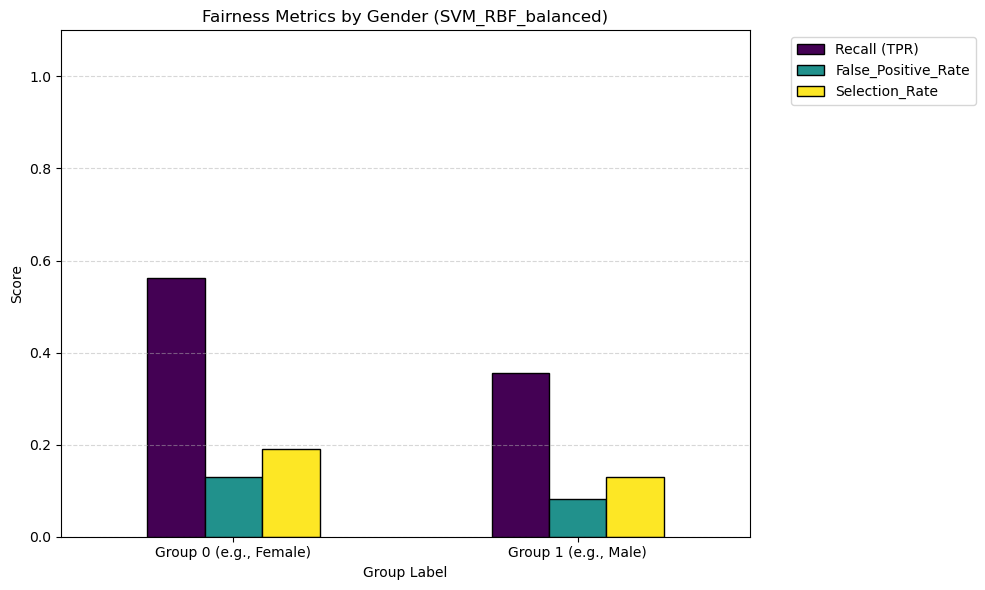

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuration
sensitive_feature = 'Gender'  # The demographic column to audit
model_name = 'SVM_RBF_balanced' # Using the balanced SVM model

# 2. Retrieve Model and Get Predictions
# We access the model directly from the dictionary
model = balanced_all_models[model_name]
print(f"\n=== Fairness Analysis by {sensitive_feature} (Model: {model_name}) ===")

# Predict on the test set
y_pred = model.predict(X_test)

# 3. Group Data by Sensitive Attribute
groups = X_test[sensitive_feature]
unique_groups = sorted(groups.unique())

metrics_list = []

for g in unique_groups:
    mask = (groups == g)
    y_test_g = y_test[mask]
    y_pred_g = y_pred[mask]

    # Skip empty groups
    if len(y_test_g) == 0:
        continue

    # Calculate Metrics
    acc = accuracy_score(y_test_g, y_pred_g)
    cm = confusion_matrix(y_test_g, y_pred_g, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    selection_rate = (tp + fp) / len(y_test_g)

    metrics_list.append({
        "Group_Value": g,
        "Group_Size": len(y_test_g),
        "Accuracy": acc,
        "Recall (TPR)": recall,
        "False_Positive_Rate": fpr,
        "Selection_Rate": selection_rate
    })

# 4. Display Results
fairness_df = pd.DataFrame(metrics_list)

# Auto-generate labels (Modify these if your encoding is different, e.g., 0=Male, 1=Female)
group_map = {0: "Group 0 (e.g., Female)", 1: "Group 1 (e.g., Male)"}
fairness_df["Group Label"] = fairness_df["Group_Value"].map(group_map).fillna(fairness_df["Group_Value"].astype(str))

display_cols = ["Group Label", "Group_Size", "Accuracy", "Recall (TPR)", "False_Positive_Rate", "Selection_Rate"]
print(fairness_df[display_cols].round(3).to_string(index=False))

# 5. Check Disparate Impact (Four-Fifths Rule)
# We only check if we have exactly 2 groups for simplicity
if len(fairness_df) == 2:
    sr_0 = fairness_df.iloc[0]["Selection_Rate"]
    sr_1 = fairness_df.iloc[1]["Selection_Rate"]

    if sr_1 > 0:
        impact_ratio = sr_0 / sr_1
        print(f"\nDisparate Impact Ratio (Group 0 / Group 1): {impact_ratio:.3f}")

        if impact_ratio < 0.8:
            print(">> Warning: Potential Bias against Group 0 (Ratio < 0.8).")
        elif impact_ratio > 1.25:
            print(">> Warning: Potential Bias against Group 1 (Ratio > 1.25).")
        else:
            print(">> Result: Fair (Ratio within 0.8 - 1.25).")
    else:
        print("\nCannot calculate impact ratio (Group 1 selection rate is 0).")

# 6. Visualization
fairness_df.plot(
    x="Group Label",
    y=["Recall (TPR)", "False_Positive_Rate", "Selection_Rate"],
    kind="bar",
    figsize=(10, 6),
    colormap="viridis", # Changed to viridis for better contrast
    edgecolor="black"
)
plt.title(f"Fairness Metrics by {sensitive_feature} ({model_name})")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()